In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
olive_faces = fetch_olivetti_faces()

target = olive_faces.target
predictor = olive_faces.data
lb = preprocessing.LabelBinarizer()
target = lb.fit_transform(target)
X_train, X_test, y_train, y_test = train_test_split( predictor, target, test_size=0.10, random_state=42)
learning_rate = 0.1
training_epochs = 200
display_step = 1
x = tf.placeholder(tf.float32, shape=([None, 4096]),name = 'image')
y = tf.placeholder(tf.float32, shape=([None, 40]), name = 'label')
w = tf.Variable(tf.zeros(shape=[4096, 40]), name="weights")
b = tf.Variable(tf.zeros([40]), name="bias")
#defining the activation function
actv = tf.nn.softmax(tf.matmul(x,w) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(actv), reduction_indices=1))
optim = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
pred = tf.equal(tf.argmax(actv, 1), tf.argmax(y,1))
accr = tf.reduce_mean(tf.cast(pred, "float"))
init =  tf.initialize_all_variables()
# Create a summary to monitor cost tensor
tf.summary.histogram("loss", )
tf.summary.scalar("loss", cross_ecross_entropyntropy)
# Create a summary to monitor accuracy tensor
tf.summary.histogram("accuracy", accr)
tf.summary.scalar("accuracy", accr)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()
train_accuracy_list = []
test_accuracy_list =[]


with tf.Session() as sess:
    
    
    sess.run(init)
    summary_writer = tf.summary.FileWriter("C:\\Users\\saikiran\\Desktop\\tensorboard", graph=tf.get_default_graph())
    
    avg_cost = 0.
    #Training cycle
    for epoch in range(training_epochs):
        
        batch_xs = X_train
        batch_ys = y_train
        batch_xs1 = X_test
        batch_ys1 = y_test
        #Fit training using batch data
        opt,cost,summary=sess.run([optim,cross_entropy,merged_summary_op], feed_dict={x: batch_xs, y: batch_ys})
        summary_writer.add_summary(summary,epoch)
        
        #Compute average loss
        avg_cost += sess.run(cross_entropy, feed_dict={x:batch_xs, y:batch_ys})/len(X_train)
       
       
        
        
        
        #Display logs per epoch step
        if epoch%display_step ==0:
            
            
            
            train_acc = accr.eval({x:batch_xs, y:batch_ys})
            train_acc = train_acc * 100
            
            #train_writer.add_summary(train_acc, epoch)
            
            train_accuracy_list = np.append(train_accuracy_list,train_acc)
            print ("Epoch: %03d cross entropy: %.9f train_acc_in_percentage: %.3f" % (epoch,avg_cost, train_acc))
            test_acc = accr.eval({x:batch_xs1, y:batch_ys1})
            test_acc = test_acc * 100
            #train_writer.add_summary(test_acc, epoch)
           
            
            test_accuracy_list = np.append(test_accuracy_list,test_acc)
            
            
            
            print ("Epoch: %03d cross entropy: %.9f test_acc_in_percentage: %.3f" % (epoch,avg_cost, test_acc))
    print ("Optimization Complete!")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 000 cross entropy: 0.010130538 train_acc_in_percentage: 5.556
Epoch: 000 cross entropy: 0.010130538 test_acc_in_percentage: 0.000
Epoch: 001 cross entropy: 0.020464673 train_acc_in_percentage: 25.556
Epoch: 001 cross entropy: 0.020464673 test_acc_in_percentage: 42.500
Epoch: 002 cross entropy: 0.031225234 train_acc_in_percentage: 14.444
Epoch: 002 cross entropy: 0.031225234 test_acc_in_percentage: 0.000
Epoch: 003 cross entropy: 0.043680584 train_acc_in_percentage: 27.222
Epoch: 003 cross entropy: 0.043680584 test_acc_in_percentage: 27.500
Epoch: 004 cross entropy: 0.054935109 train_acc_in_percentage: 10.833
Epoch: 004 cross entropy: 0.054935109 test_acc_in_percentage: 10.000
Epoch: 005 cross entropy: 0.068009112 train_acc_in_percentage: 8.333
Epoch: 005 cross entropy: 0.068009112 test_acc_in_percentage: 0.000
Epoch: 006 cross entropy: 0.080326535 train_acc_in_percentage: 8.611
Epoch: 006 cross entropy: 0.

Epoch: 059 cross entropy: 0.539228319 train_acc_in_percentage: 60.556
Epoch: 059 cross entropy: 0.539228319 test_acc_in_percentage: 62.500
Epoch: 060 cross entropy: 0.544538790 train_acc_in_percentage: 72.500
Epoch: 060 cross entropy: 0.544538790 test_acc_in_percentage: 40.000
Epoch: 061 cross entropy: 0.549438750 train_acc_in_percentage: 65.278
Epoch: 061 cross entropy: 0.549438750 test_acc_in_percentage: 60.000
Epoch: 062 cross entropy: 0.554398815 train_acc_in_percentage: 67.500
Epoch: 062 cross entropy: 0.554398815 test_acc_in_percentage: 45.000
Epoch: 063 cross entropy: 0.559336426 train_acc_in_percentage: 56.667
Epoch: 063 cross entropy: 0.559336426 test_acc_in_percentage: 60.000
Epoch: 064 cross entropy: 0.564912606 train_acc_in_percentage: 73.056
Epoch: 064 cross entropy: 0.564912606 test_acc_in_percentage: 50.000
Epoch: 065 cross entropy: 0.570155063 train_acc_in_percentage: 63.611
Epoch: 065 cross entropy: 0.570155063 test_acc_in_percentage: 65.000
Epoch: 066 cross entropy: 0

Epoch: 119 cross entropy: 0.749746753 train_acc_in_percentage: 90.000
Epoch: 119 cross entropy: 0.749746753 test_acc_in_percentage: 75.000
Epoch: 120 cross entropy: 0.751993992 train_acc_in_percentage: 86.111
Epoch: 120 cross entropy: 0.751993992 test_acc_in_percentage: 87.500
Epoch: 121 cross entropy: 0.754217473 train_acc_in_percentage: 91.944
Epoch: 121 cross entropy: 0.754217473 test_acc_in_percentage: 75.000
Epoch: 122 cross entropy: 0.756268683 train_acc_in_percentage: 87.222
Epoch: 122 cross entropy: 0.756268683 test_acc_in_percentage: 85.000
Epoch: 123 cross entropy: 0.758201714 train_acc_in_percentage: 92.222
Epoch: 123 cross entropy: 0.758201714 test_acc_in_percentage: 80.000
Epoch: 124 cross entropy: 0.760296209 train_acc_in_percentage: 87.222
Epoch: 124 cross entropy: 0.760296209 test_acc_in_percentage: 82.500
Epoch: 125 cross entropy: 0.762351867 train_acc_in_percentage: 92.778
Epoch: 125 cross entropy: 0.762351867 test_acc_in_percentage: 85.000
Epoch: 126 cross entropy: 0

Epoch: 181 cross entropy: 0.846473467 train_acc_in_percentage: 95.278
Epoch: 181 cross entropy: 0.846473467 test_acc_in_percentage: 80.000
Epoch: 182 cross entropy: 0.847633089 train_acc_in_percentage: 96.111
Epoch: 182 cross entropy: 0.847633089 test_acc_in_percentage: 92.500
Epoch: 183 cross entropy: 0.848744454 train_acc_in_percentage: 95.833
Epoch: 183 cross entropy: 0.848744454 test_acc_in_percentage: 82.500
Epoch: 184 cross entropy: 0.849855428 train_acc_in_percentage: 97.500
Epoch: 184 cross entropy: 0.849855428 test_acc_in_percentage: 95.000
Epoch: 185 cross entropy: 0.850950893 train_acc_in_percentage: 95.556
Epoch: 185 cross entropy: 0.850950893 test_acc_in_percentage: 85.000
Epoch: 186 cross entropy: 0.852056192 train_acc_in_percentage: 96.389
Epoch: 186 cross entropy: 0.852056192 test_acc_in_percentage: 95.000
Epoch: 187 cross entropy: 0.853113400 train_acc_in_percentage: 95.833
Epoch: 187 cross entropy: 0.853113400 test_acc_in_percentage: 85.000
Epoch: 188 cross entropy: 0

train accuracy after 200 epochs is: 98.0555534362793
test accuracy after 200 epochs is: 92.5000011920929


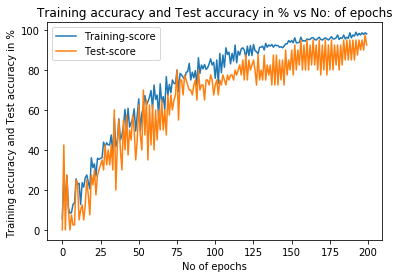

In [2]:
print("train accuracy after 200 epochs is:", train_accuracy_list[training_epochs-1])
print("test accuracy after 200 epochs is:",test_accuracy_list[training_epochs-1])
epochs = np.arange(200)
plt.plot(epochs,train_accuracy_list)
plt.plot(epochs,test_accuracy_list)
plt.title("Training accuracy and Test accuracy in % vs No: of epochs")
plt.ylabel("Training accuracy and Test accuracy in % ")
plt.xlabel("No of epochs")
plt.legend(['Training-score','Test-score'], loc='upper left')
plt.show()